In [102]:
import numpy as np
from skimage import io
from scipy.ndimage import convolve
from skimage.color import rgb2gray

In [103]:
image = io.imread("/Users/piotr/Downloads/tukan-wielki.jpg")

In [104]:
image.shape

(400, 600, 3)

In [105]:
gray_image = rgb2gray(image)

# **Rozmywanie**

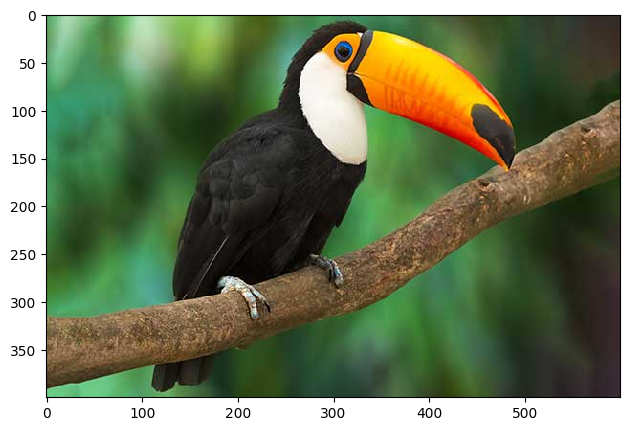

In [106]:
io.imshow(image)

In [107]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def mean_kernel(size):
    kernel = np.ones([size, size])
    return kernel/ (size**2)

In [108]:
Gauss_filter = gaussian_kernel(11, 1)
Gauss_filter

array([[2.21033495e-12, 1.98968011e-10, 6.58891561e-09, 8.02694246e-08,
        3.59742603e-07, 5.93115282e-07, 3.59742603e-07, 8.02694246e-08,
        6.58891561e-09, 1.98968011e-10, 2.21033495e-12],
       [1.98968011e-10, 1.79105296e-08, 5.93115282e-07, 7.22562334e-06,
        3.23829971e-05, 5.33905362e-05, 3.23829971e-05, 7.22562334e-06,
        5.93115282e-07, 1.79105296e-08, 1.98968011e-10],
       [6.58891561e-09, 5.93115282e-07, 1.96412806e-05, 2.39279782e-04,
        1.07237759e-03, 1.76805174e-03, 1.07237759e-03, 2.39279782e-04,
        1.96412806e-05, 5.93115282e-07, 6.58891561e-09],
       [8.02694246e-08, 7.22562334e-06, 2.39279782e-04, 2.91502450e-03,
        1.30642335e-02, 2.15392796e-02, 1.30642335e-02, 2.91502450e-03,
        2.39279782e-04, 7.22562334e-06, 8.02694246e-08],
       [3.59742603e-07, 3.23829971e-05, 1.07237759e-03, 1.30642335e-02,
        5.85498323e-02, 9.65323539e-02, 5.85498323e-02, 1.30642335e-02,
        1.07237759e-03, 3.23829971e-05, 3.59742603e-

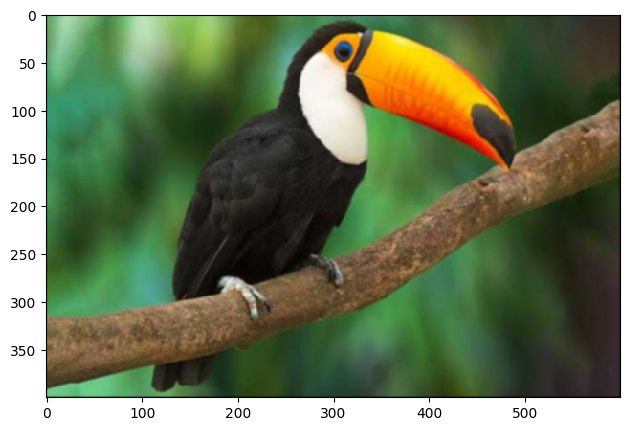

In [109]:
blured_image = np.dstack([convolve(image[:, :, channel], Gauss_filter, mode="constant", cval=0.0)
    for channel in range(3)])

io.imshow(blured_image)

In [110]:
mean_filter = mean_kernel(11)
mean_filter

array([[0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.

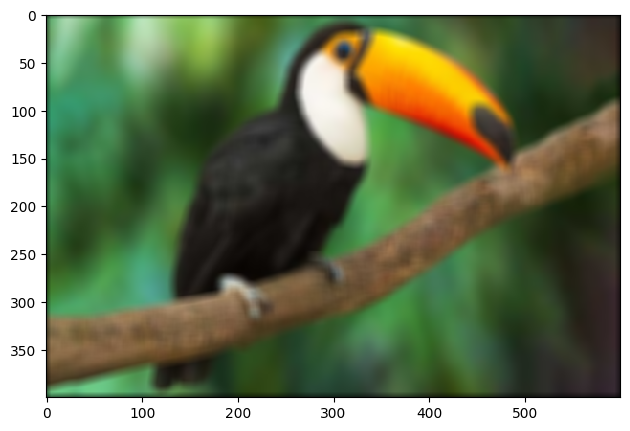

In [111]:
blured_image = np.dstack([convolve(image[:, :, channel], mean_filter, mode="constant", cval=0.0)
    for channel in range(3)])

io.imshow(blured_image)

# **Wyostrzanie**

In [112]:
sharpening_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpening_filter

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

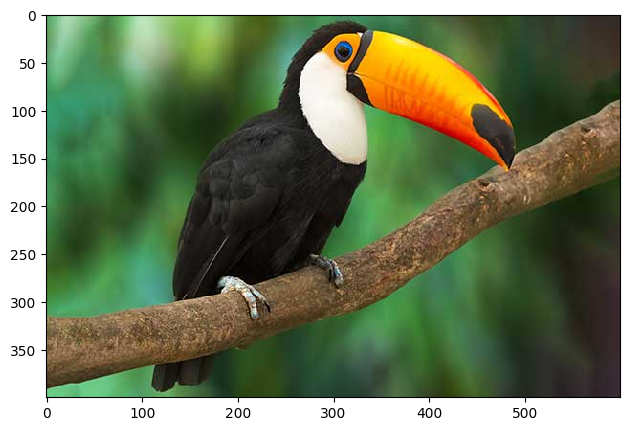

In [113]:
io.imshow(image)

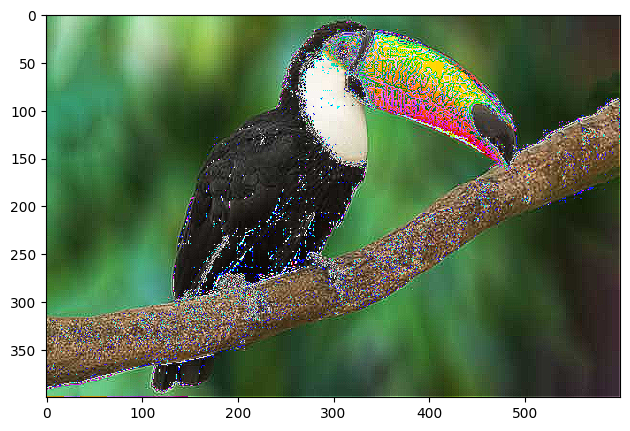

In [114]:
sharpened_image = np.dstack([convolve(image[:, :, channel], sharpening_filter, mode="constant", cval=0.0)
    for channel in range(3)])

io.imshow(sharpened_image)

In [115]:
sharpened_image = convolve(gray_image, sharpening_filter, mode="constant", cval=0.0)
sharpened_image.shape

(400, 600)

In [116]:
from skimage import exposure

sharpened_image = sharpened_image -  sharpened_image.min()
sharpened_image = sharpened_image / sharpened_image.max()

normalized_image = exposure.rescale_intensity(sharpened_image, in_range='image', out_range=(0, 1))

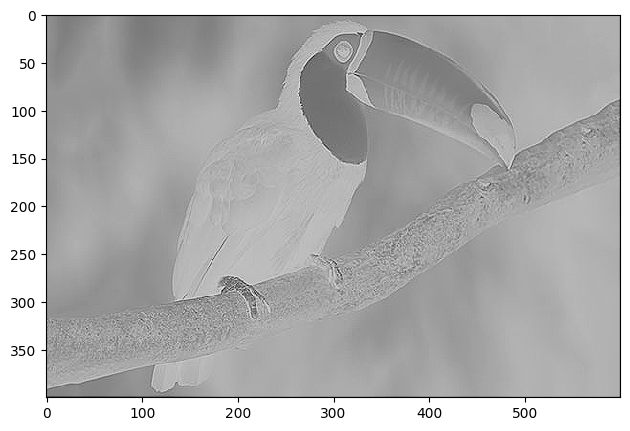

In [117]:
io.imshow(normalized_image, cmap="Greys")

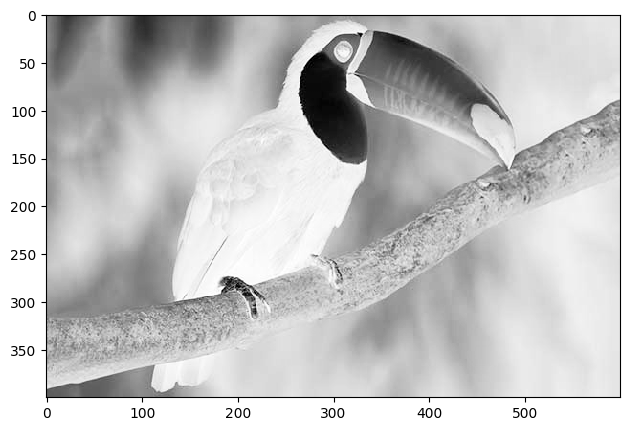

In [118]:
io.imshow(gray_image, cmap='Greys')

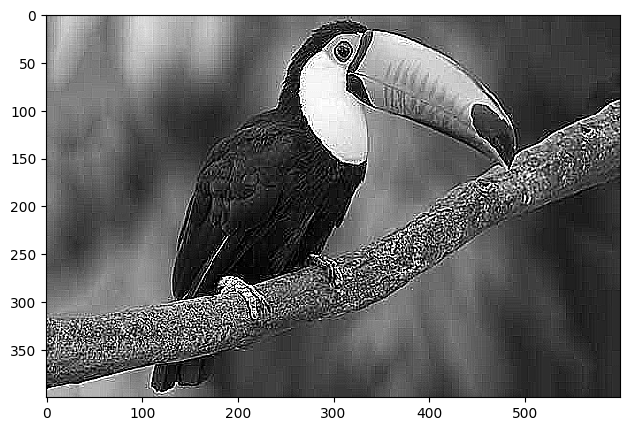

In [119]:
prewitt_sharpening = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])

enhanced_image = convolve(gray_image, prewitt_sharpening)

enhanced_image = np.clip(enhanced_image, 0, 1)

io.imshow(enhanced_image)

# **Wykrywanie krawędzi**

**Filtr Roberts'a Cross'a**

In [120]:
kernel_x = np.array([[1, 0], [0, -1]])

kernel_y = np.array([[0, 1], [-1, 0]])

kernel_x

array([[ 1,  0],
       [ 0, -1]])

In [121]:
filtered_image_x = convolve(gray_image, kernel_x)
filtered_image_y = convolve(gray_image, kernel_y)

In [122]:
filtered_image = np.sqrt(filtered_image_x**2 + filtered_image_y**2)

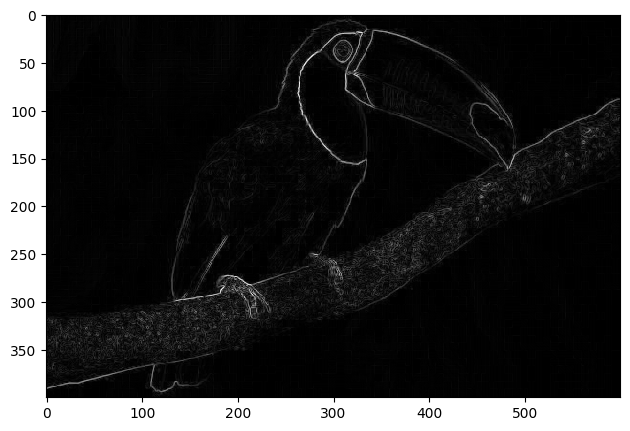

In [123]:
filtered_image = np.clip(filtered_image, 0, 1)

io.imshow(filtered_image)

**Filtr Laplace'a**

In [124]:
laplace_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplace_filter

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

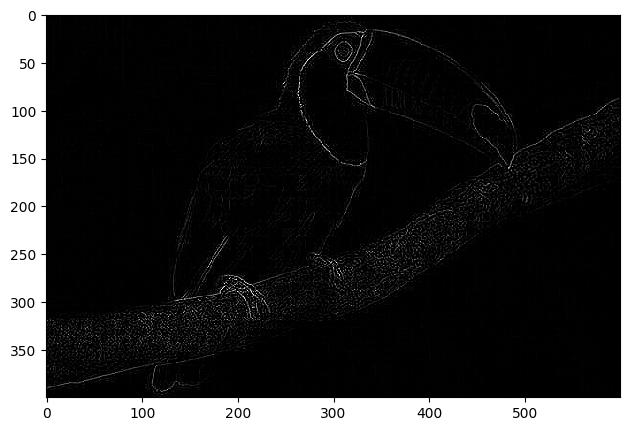

In [125]:
filtered_image = convolve(gray_image, laplace_filter)
filtered_image = np.clip(filtered_image, 0, 1)

io.imshow(filtered_image)

**Filtr Sobela**

In [126]:
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [127]:
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_filter_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

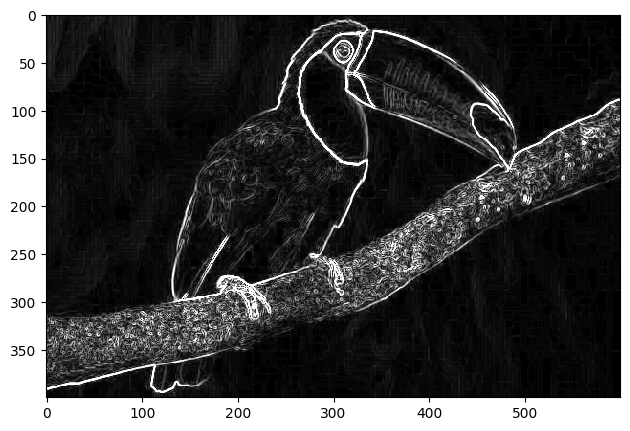

In [128]:
filtered_image_x = convolve(gray_image, sobel_filter_x)
filtered_image_y = convolve(gray_image, sobel_filter_y)

filtered_image = np.sqrt(filtered_image_x**2 + filtered_image_y**2)

filtered_image = np.clip(filtered_image, 0, 1)

io.imshow(filtered_image)

**Operator Prewitta**

In [129]:
prewitt_filter_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

prewitt_filter_y = np.array([[-1, -1, -1], [ 0,  0,  0], [ 1,  1,  1]])


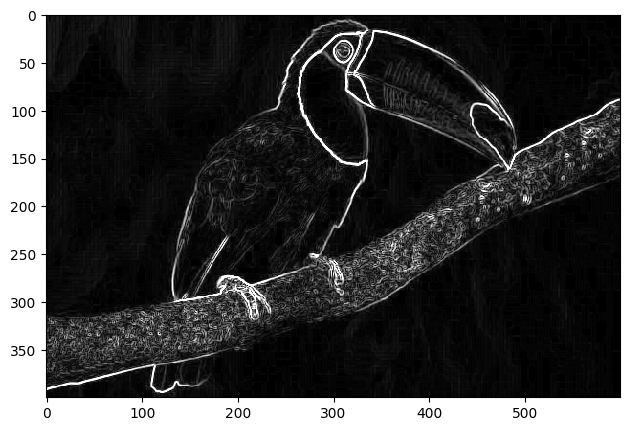

In [130]:
filtered_image_x = convolve(gray_image, prewitt_filter_x)
filtered_image_y = convolve(gray_image, prewitt_filter_y)

filtered_image = np.sqrt(filtered_image_x**2 + filtered_image_y**2)

filtered_image = np.clip(filtered_image, 0, 1)

io.imshow(filtered_image)

**Operator Scharr**

In [131]:
scharr_filter_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
scharr_filter_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

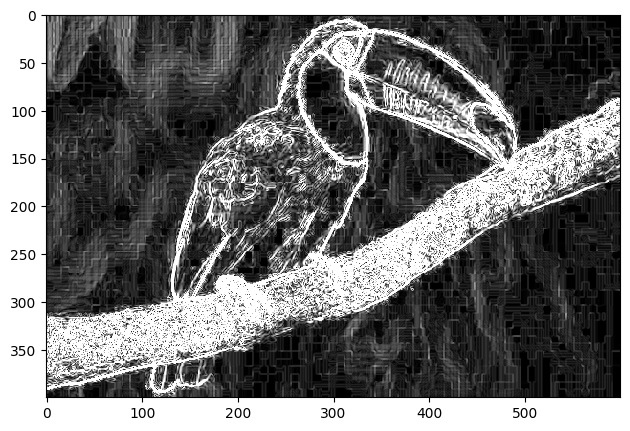

In [132]:
filtered_image_x = convolve(gray_image, scharr_filter_x)
filtered_image_y = convolve(gray_image, scharr_filter_y)

filtered_image = np.sqrt(filtered_image_x**2 + filtered_image_y**2)

filtered_image = np.clip(filtered_image, 0, 1)

io.imshow(filtered_image)